### The following is a Python script based on the Skelt Harrison Saturation Height Function, intended for use with Core Data.

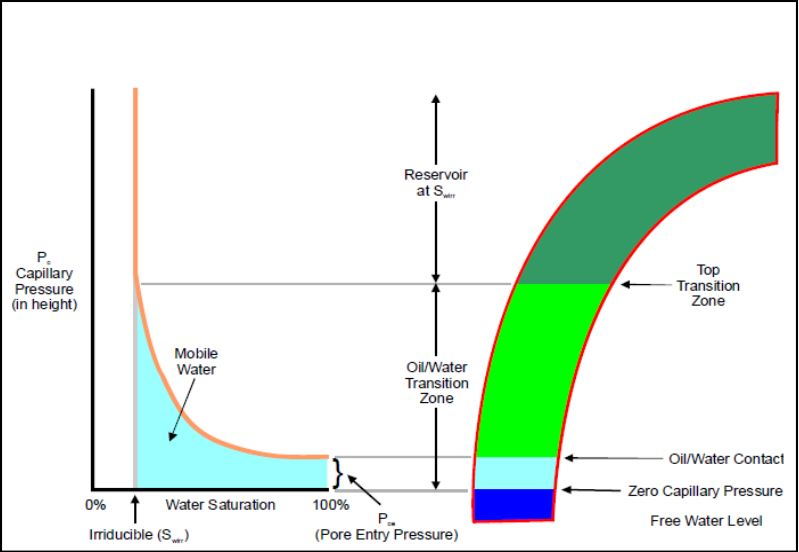

### Munish Kumar (2020)

#### Libraries

In [1]:
# General Libraries
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
import time
import re
import requests
import pickle
import seaborn as sns
import os
import glob
import sys
sns.set()

# Sklearn Liraries
from sklearn import preprocessing

import datetime
from datetime import timedelta, date 
start = time.time()
%matplotlib inline

# Forces the print statement to show everything and not truncate
# np.set_printoptions(threshold=sys.maxsize) 
print('Libraries imported')

Libraries imported


#### Globals

In [2]:
dir_name = r'C:\Users\quant\Anaconda3\@Projects'
filename_suffix = 'csv'

#### Read File

In [3]:
# Means read in the ',' as thousand seperator
df = pd.read_csv('SHM_Model_Test.csv', thousands=',')
df.tail()

,PC,0.004,0.49,1.29,4.71,29.4,37.5,196,319,568,1147,1956,2154,3254
22,400,0.864669,0.539829,0.319096,0.411478,0.231609,0.293580,0.213700,0.158550,0.135113,0.111705,0.108996,0.095481,0.099983
23,500,0.834466,0.509931,0.264342,0.386164,0.222937,0.280931,0.207699,0.152026,0.133302,0.109976,0.106438,0.093451,0.099854
24,800,0.809825,0.493243,0.229721,0.370277,0.218445,0.273112,0.204122,0.148138,0.132387,0.109101,0.104927,0.092251,0.099800
25,1000,0.788719,0.482578,0.205325,0.359069,0.215697,0.267645,0.201681,0.145484,0.131835,0.108572,0.103903,0.091436,0.099771
26,1020,0.786758,0.481719,0.203263,0.358120,0.215480,0.267184,0.201478,0.145262,0.131791,0.108531,0.103817,0.091368,0.099769


Plot the figures

In [4]:
# Plotting function
def plot_figure(nrows, ncols, height, width, a , x, y):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols)
    fig.set_figwidth(width)
    fig.set_figheight(height)
    plt.subplot(nrows, ncols, a)
    plt.plot(x, y, 'o-')  
    plt.xlabel('Water Saturation (V/V)')
    plt.ylabel('(Log) Capillary Pressure (psi)')
    plt.title('Pc curves')
    
    a = a + 1
    plt.yscale('log')
    plt.subplot(nrows, ncols, a)        
    plt.plot(x, y, 'o-')  
    plt.xlabel('Water Saturation (V/V)')
    plt.ylabel('Capillary Pressure (psi)')
    plt.title('Pc curves')
    return

In [31]:
def plot_Scatter_with_line(RedFunction, BlueFunction, LineFunction, label):
    height=10
    width=10
    size = 20
    n = 8
    rows=1
    cols=1
    label=label

    fig, ax = plt.subplots(nrows=rows, ncols=cols)
    fig.set_figwidth(width)
    fig.set_figheight(height)

    plt.scatter(RedFunction, BlueFunction, label = label, s=size*n, c = 'r')
    plt.plot(RedFunction, LineFunction, '-k', linewidth = size/n)

    plt.ylabel('a = 1-SWIRR', fontsize = size+5)
    plt.xlabel('ln k', fontsize = size+5)
    plt.legend(loc='upper left', fontsize = size+5)

    font = {'family' : 'Sans-serif',
            'weight' : 'bold',
            'size'   : size}
    plt.rc('font', **font)

    ax = plt.gca()
    ax.tick_params(axis = 'both', which = 'major', labelsize = size-5)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = size-5)

    plt.show()
    return    

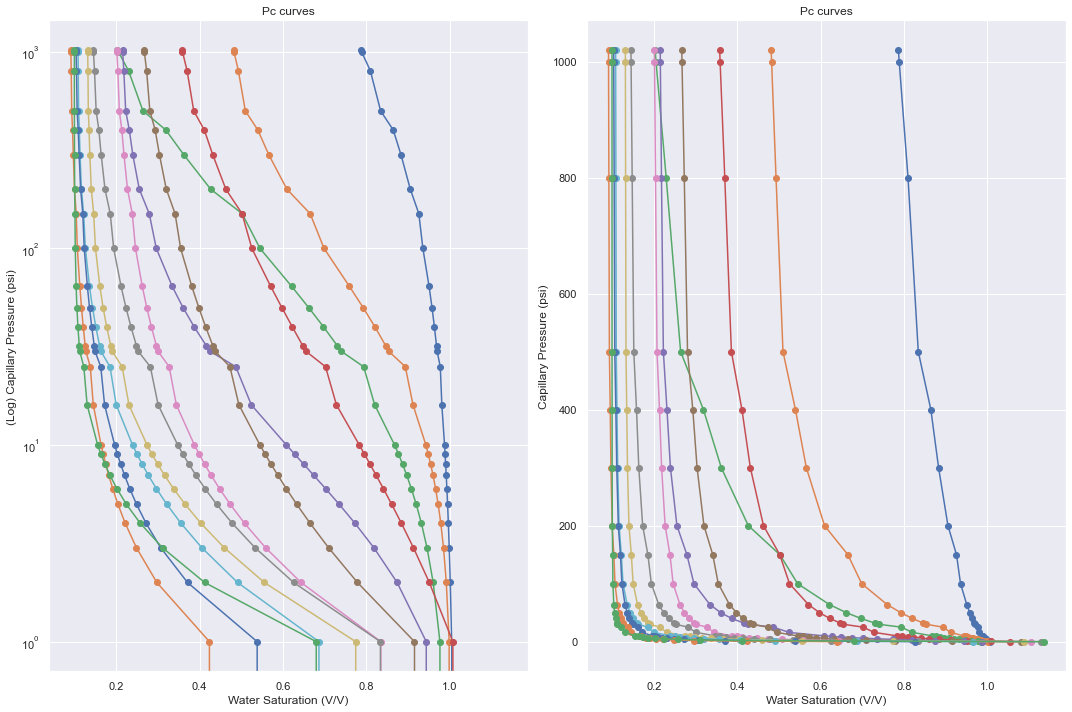

In [5]:
nrows = 1
ncols = 2
height=10
width=15

x1 = df.loc[:, df.columns != 'PC']
y1 = df['PC']

plot_figure(nrows, ncols, height, width, 1, x1, y1)

plt.tight_layout()
plt.show()

In [6]:
df.columns.values

array(['PC', '0.004', '0.49', '1.29', '4.71', '29.4', '37.5', '196',
       '319', '568', '1147', '1956', '2154', '3254'], dtype=object)

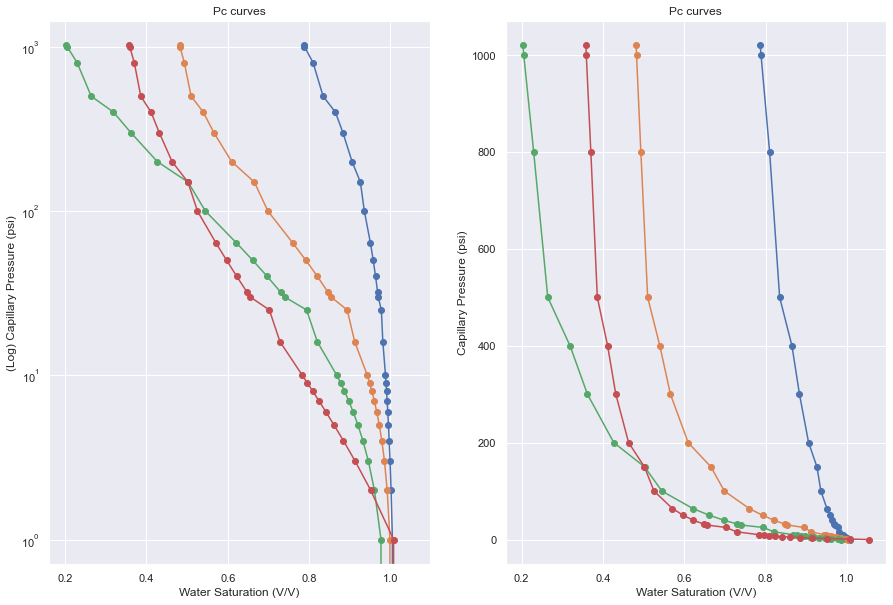

In [7]:
#Filter Data frame so that only samples <10 mD are included
Feature = df[[
'0.004', '0.49', '1.29', '4.71'
]]
x2=Feature

plot_figure(nrows, ncols, height, width, 1, x2, y1)

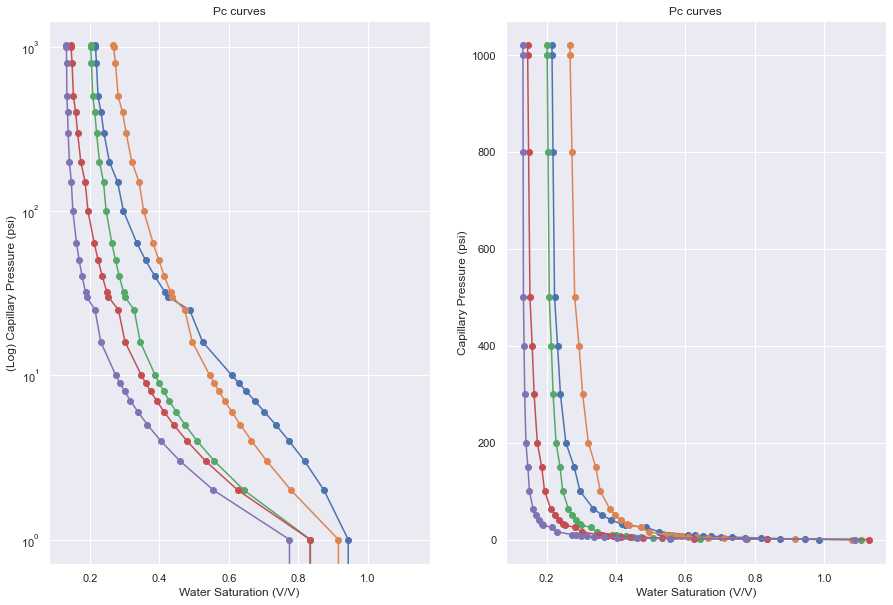

In [8]:
#Filter Data frame so that only samples >10 mD & < 1000 mD are included
Feature = df[[
'29.4', '37.5', '196', '319', '568', 
]]
x3=Feature

plot_figure(nrows, ncols, height, width, 1, x3, y1)

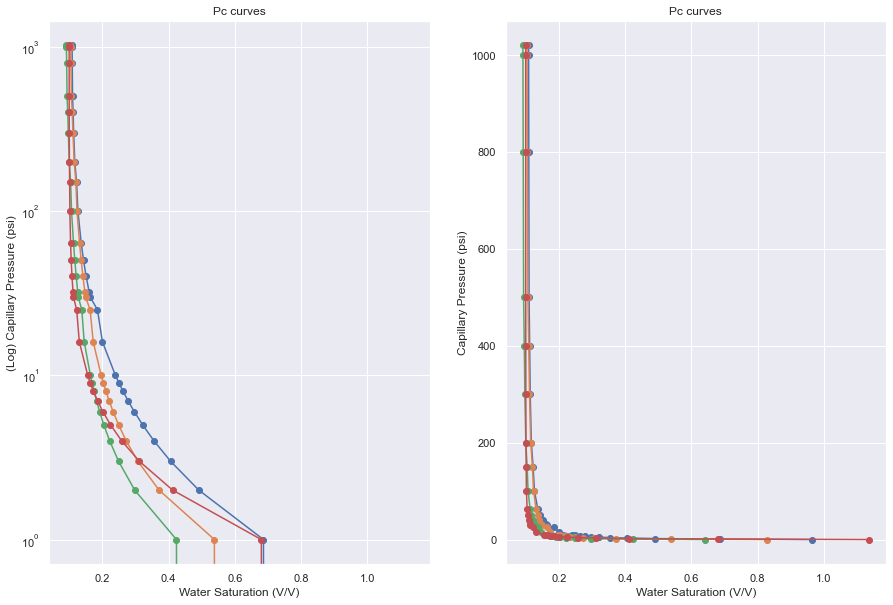

In [9]:
#Filter Data frame so that only samples > 1000 mD are included
Feature = df[[
'1147', '1956', '2154', '3254', 
]]
x4=Feature

plot_figure(nrows, ncols, height, width, 1, x4, y1)

In [10]:
df2 = df.iloc[-1]
df2 = df2.rename_axis('PC').reset_index()
df2

,PC,26
0,PC,1020.000000
1,0.004,0.786758
2,0.49,0.481719
3,1.29,0.203263
4,4.71,0.358120
5,29.4,0.215480
6,37.5,0.267184
7,196,0.201478
8,319,0.145262
9,568,0.131791


In [11]:
a = df2[1:].copy()
col={'PC': 'k', 26:'SWIRR'}
a.rename(columns=col, inplace=True)
a['1-SWIRR']=1-a['SWIRR']
a['ln k'] = np.log(a['k'].astype('float'))
a

,k,SWIRR,1-SWIRR,ln k
1,0.004,0.786758,0.213242,-5.521461
2,0.49,0.481719,0.518281,-0.713350
3,1.29,0.203263,0.796737,0.254642
4,4.71,0.358120,0.641880,1.549688
5,29.4,0.215480,0.784520,3.380995
6,37.5,0.267184,0.732816,3.624341
7,196,0.201478,0.798522,5.278115
8,319,0.145262,0.854738,5.765191
9,568,0.131791,0.868209,6.342121
10,1147,0.108531,0.891469,7.044905


In [12]:
# Reshape and cast to train set
x_train = np.array(a['ln k']).reshape(-1, 1)
y_train = a['1-SWIRR']
print(x_train.shape)
print(y_train.shape)

(13, 1)
(13,)


### Start of building the Skelt Harrison Model

#### Step 1: Simple Linear Regression line fit to seed 'a'

In [13]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(x_train, y_train)

# The coefficients & intercept
print("Coefficients: ", regr.coef_)
print("Intercept: ", regr.intercept_)

Coefficients:  [0.04577137]
Intercept:  0.5770021510297487


In [14]:
from sklearn.metrics import r2_score

yhat = regr.predict(x_train)

print("Error Analysis:")
print("=================================================================")
print("Mean Absolute Error: %.3f" %np.mean(np.absolute(yhat - y_train)))
print("Residual Sum of Squares (MSE): %.3f" %np.mean((yhat - y_train)**2))
print("R2-score: %.3f" %r2_score(yhat, y_train))

Error Analysis:
Mean Absolute Error: 0.042
Residual Sum of Squares (MSE): 0.005
R2-score: 0.846


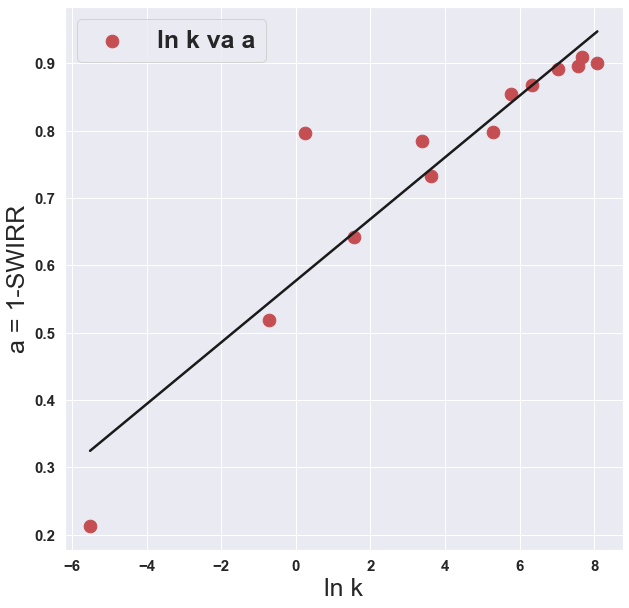

In [33]:
RedFunction = x_train # x-value
BlueFunction = y_train # y-value
LineFunction = regr.coef_[0]*x_train + regr.intercept_
label = "ln k va a"
plot_Scatter_with_line(RedFunction, BlueFunction, LineFunction, label)

#### Step 2: Calculate the value of seed 'a', and set 'b', 'c' and 'd' initially

In [35]:
b_init = 1
c_init = 1
d_init = 0.001

a_init = x_train*regr.coef_ + regr.intercept_
print(a_init[0])

[0.32427733]


###  Predict Sw using Skelt-Harrison Equation. Determine the Difference with the measured values
#### Skelt Harrison Equation:
$ Sw = 1 - a\exp[-(\frac{b}{Pc + d})^c] $

In [38]:
df_Sw_pred = 1 - a_init*np.exp(-(b_init/(df['Pc']+d_init))^c_init)

KeyError: 'Pc'

In [18]:
count = 'Completed Process'
elapsed = (time.time() - start)
print ("%s in %s seconds" % (count,elapsed))

Completed Process in 2.7343196868896484 seconds
